In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.xkcd()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data  = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Data preprocessing


In [3]:
# visualizing the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape


(891, 12)

### so our dataset have 891 rows and 12 columns 

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### so there are 177 null entries in age and 687 null entries in cabin whereas only 2 null entries in embarked

In [7]:
#counting the number of men and women
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

##### We can clearly see the number of men are more than number of women

<AxesSubplot:xlabel='Sex', ylabel='count'>

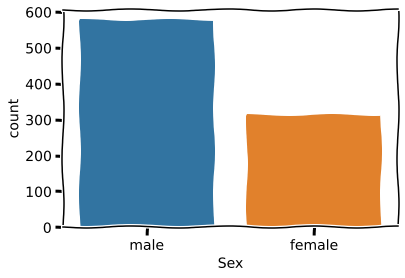

In [8]:
#make the count plot for sex
sns.countplot(x='Sex', data = train_data)

In [9]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

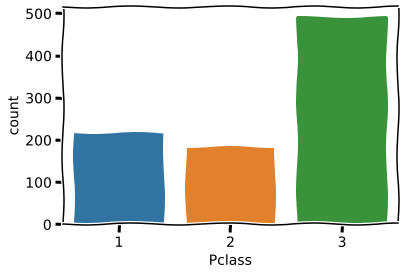

In [10]:
sns.countplot(x='Pclass', data=train_data)

In [11]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

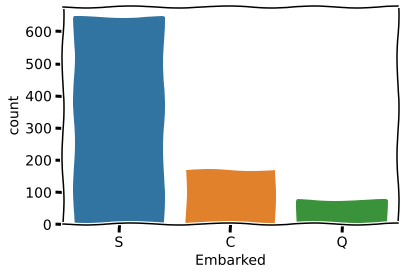

In [12]:
sns.countplot(x='Embarked', data=train_data)

In [13]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

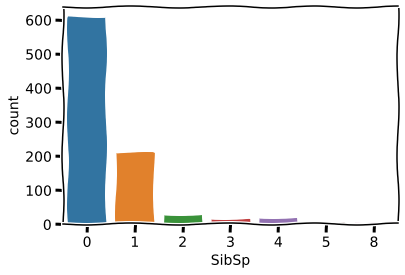

In [14]:
sns.countplot(x='SibSp',data = train_data)

##### this getting not possible to watch for all the values so we can use log function in sns 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

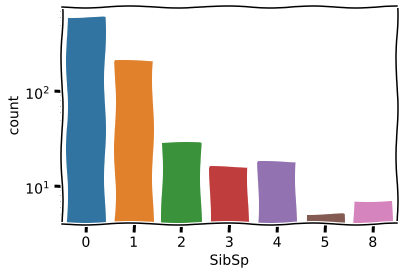

In [15]:
sns.countplot(x='SibSp',data = train_data , log = True)

## Visulaizing the survival on base of gender

In [16]:
train_data['Died'] = 1 - train_data['Survived']

<AxesSubplot:xlabel='Sex'>

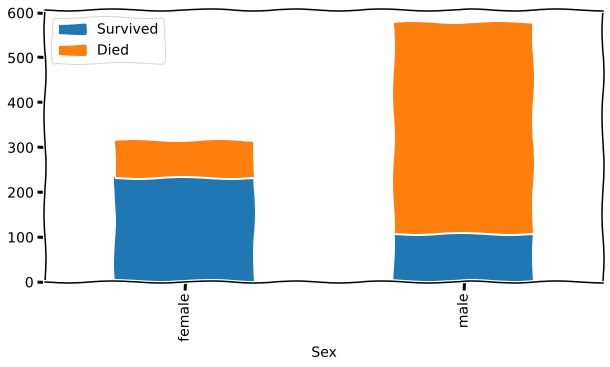

In [17]:
train_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

##### Can clearly see the women survival chances are much more than man 


<AxesSubplot:xlabel='Sex'>

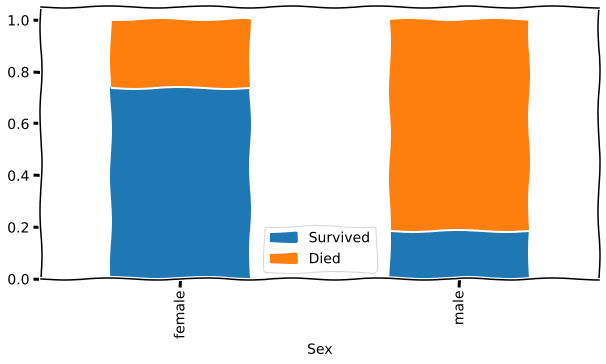

In [18]:
# let try to plot the same graph with ratio 
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                            figsize=(10, 5),
                                                            stacked=True)

##### So nearly 80 percent of women got survived whereas only approx 20 percent of men could live more 

#### Now visualiszng on the base of fare

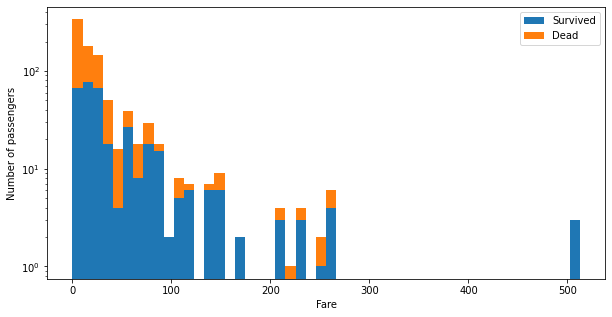

In [19]:
figure = plt.figure(figsize=(10, 5))
plt.rcdefaults()
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'],log = True)
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first

## Feature engineering

In [20]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [21]:
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Jonkheer', 'Ms', 'Lady', 'Mrs', 'Capt', 'Miss', 'Major', 'Mr', 'Sir', 'Master', 'Mlle', 'Don', 'Dr', 'the Countess', 'Rev', 'Mme', 'Col'}


In [22]:
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": 
                    "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev"
                    : "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss",
                    "Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : 
                    "Master","Lady" : "Royalty"}

In [23]:
train_data['Title'] = train_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_data['Title'] = train_data.Title.map(Title_Dictionary)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [24]:
train_data['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

## Cleaning the dataset

In [25]:
#Removing the usless enteries from the dataset 
df1=train_data.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [26]:
train_data.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [27]:
# Converting categorical feature to numeric
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.Title=df1.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0


In [28]:
# median age of each sex
median_age_men=df1[df1['Sex']==1]['Age'].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()

In [29]:
# filling null values in 'Age' with respective median age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men


we can also remove those entries in which age is not given but our dataset size is already very small and we would not like our model to be undefit for we will fill it with median we can also use the mode and mean too 

In [30]:
# checking for null values
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [31]:
# dropping rows with null value
df1.dropna(inplace=True)

In [32]:
# Data is cleaned to have no null value
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## Feature Scaling

In [33]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.395017,0.524184,0.382452,32.096681,0.733408
std,0.486260,0.834700,0.477538,12.984264,1.103705,0.806761,49.697504,1.051499
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


## Data Modeling

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived
)

* Let firstly try it with logestic regression


In [36]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.848314606741573

#### Confusion Matrix

In [37]:
plt.xkcd()
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, Y_pred)
cm

array([[99, 11],
       [16, 52]])

<AxesSubplot:>

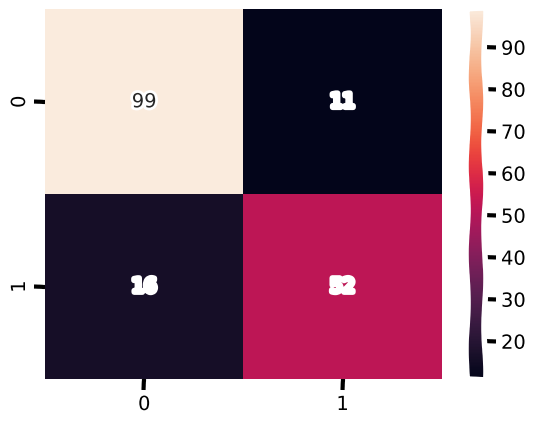

In [38]:
sns.heatmap(cm,annot=True)

## Cleaning test dataset

In [39]:
# test dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Different titles in the train set are:

In [40]:
titles = set()
for name in test_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Ms', 'Mrs', 'Miss', 'Mr', 'Master', 'Dona', 'Dr', 'Rev', 'Col'}


In [41]:
test_data['Title'] = test_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data.Title.map(Title_Dictionary)
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [42]:
# dropping unwanted columns
df2=test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [43]:
# Converting categorical feature to numeric
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
df2.Title=df2.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


In [44]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [45]:
# median age of each sex
median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [46]:
# filling null values with respective median age
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [47]:
# filling null values with median fare
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [48]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [49]:
# Null value in the title column
df2[df2.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


##### Since the person is a woman with age 39, filling the title with 2 (mapped value for the title 'Mrs')

In [50]:
df2=df2.fillna(2)

In [51]:
# Data is cleaned to have no null value
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [52]:
# feature scaling
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [53]:
# test dataset
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.452723,0,0,0.015282,2,0.0
1,3,0,0.617566,1,0,0.013663,0,2.0
2,2,1,0.815377,0,0,0.018909,2,0.0
3,3,1,0.353818,0,0,0.016908,0,0.0
4,3,0,0.287881,1,1,0.023984,0,2.0


# Prediction

In [54]:
pred = clf.predict(df2)


In [55]:
pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

Converting our submsiion to csv file for the submission 


In [56]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": pred
    })
submission.to_csv('submission.csv', index=False)

In [57]:
pred_df = pd.read_csv('submission.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

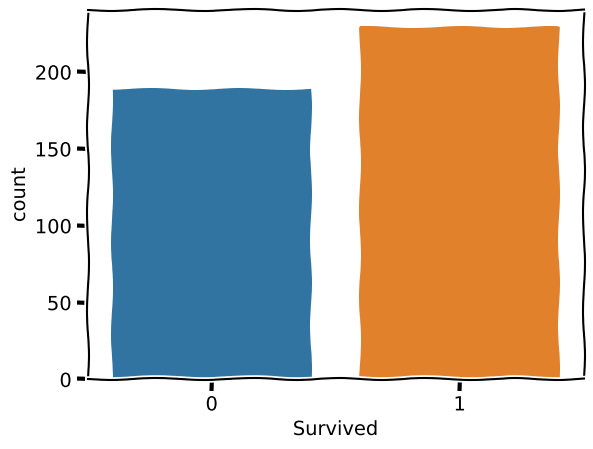

In [58]:
# visualizing predicted values
sns.countplot(x='Survived', data=pred_df)

Thankyou for reading this notebook ... ❤️